# Exploratory Data Analysis

In [1]:
from datetime import datetime
from typing import Dict, List

import geopandas as gpd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from metr.components.metadata import Metadata
from metr.components.metr_imc.traffic_data import TrafficData

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False  # 음수 부호 깨짐 방지

## Data Preparation

In [2]:
print("METR-LA")
roads_la: gpd.GeoDataFrame = gpd.read_file("../datasets/METRLA/miscellaneous/sensor_nodes.shp")
roads_la.explore(color="blue")

METR-LA


In [3]:
print("PEMS-BAY")
roads_pems: gpd.GeoDataFrame = gpd.read_file("../datasets/PEMSBAY/miscellaneous/sensor_nodes.shp")
roads_pems.explore(color="blue")

PEMS-BAY


In [4]:
print("Incheon")
roads_imc: gpd.GeoDataFrame = gpd.read_file("../datasets/metr-imc/miscellaneous/sensor_nodes.shp")
roads_imc.explore(color="blue")

Incheon


In [5]:
df_la = pd.read_hdf("../datasets/METRLA/metr-la.h5")
df_la.iloc[:, :7]

773869     767541     767542     717447     717446  \
2012-03-01 00:00:00  64.375000  67.625000  67.125000  61.500000  66.875000   
2012-03-01 00:05:00  62.666667  68.555556  65.444444  62.444444  64.444444   
2012-03-01 00:10:00  64.000000  63.750000  60.000000  59.000000  66.500000   
2012-03-01 00:15:00   0.000000   0.000000   0.000000   0.000000   0.000000   
2012-03-01 00:20:00   0.000000   0.000000   0.000000   0.000000   0.000000   
...                        ...        ...        ...        ...        ...   
2012-06-27 23:35:00  65.000000  65.888889  68.555556  61.666667   0.000000   
2012-06-27 23:40:00  61.375000  65.625000  66.500000  62.750000   0.000000   
2012-06-27 23:45:00  67.000000  59.666667  69.555556  61.000000   0.000000   
2012-06-27 23:50:00  66.750000  62.250000  66.000000  59.625000   0.000000   
2012-06-27 23:55:00  65.111111  66.888889  66.777778  61.222222   0.000000   

                        717445     773062  
2012-03-01 00:00:00  68.750000  65.125000  
2012-03-01 00:05:00  68.111111  65.000000  
2012-03-01 00:10:00  66.250000  64.500000  
2012-03-01 00:15:00   0.000000   0.000000  
2012-03-01 00:20:00   0.000000   0.000000  
...                        ...        ...  
2012-06-27 23:35:00  54.555556  62.444444  
2012-06-27 23:40:00  50.500000  62.000000  
2012-06-27 23:45:00  44.777778  64.222222  
2012-06-27 23:50:00  53.000000  64.285714  
2012-06-27 23:55:00  49.555556  65.777778  

[34272 rows x 7 columns]

In [6]:
df_pems = pd.read_hdf("../datasets/PEMSBAY/pems-bay.h5")
df_pems.iloc[:, :7]

sensor_id            400001  400017  400030  400040  400045  400052  400057
2017-01-01 00:00:00    71.4    67.8    70.5    67.4    68.8    66.6    66.8
2017-01-01 00:05:00    71.6    67.5    70.6    67.5    68.7    66.6    66.8
2017-01-01 00:10:00    71.6    67.6    70.2    67.4    68.7    66.1    66.8
2017-01-01 00:15:00    71.1    67.5    70.3    68.0    68.5    66.7    66.6
2017-01-01 00:20:00    71.7    67.8    70.2    68.1    68.4    66.9    66.1
...                     ...     ...     ...     ...     ...     ...     ...
2017-06-30 23:35:00    70.9    66.3    68.4    61.0    61.8    66.9    66.0
2017-06-30 23:40:00    71.3    66.6    68.7    60.9    62.0    66.2    66.5
2017-06-30 23:45:00    71.4    66.9    68.1    61.1    62.0    66.7    65.8
2017-06-30 23:50:00    72.2    66.5    68.0    61.1    62.5    65.8    67.1
2017-06-30 23:55:00    71.5    66.2    68.4    61.5    62.8    66.1    67.7

[52116 rows x 7 columns]

In [7]:
metr_imc = TrafficData.import_from_hdf("../datasets/metr-imc/metr-imc.h5")
df_imc = metr_imc.data
df_imc.iloc[:, :7]

1660041701  1610025902  1680058906  1660001801  \
2023-09-01 00:00:00         0.0        36.0        98.0       124.0   
2023-09-01 01:00:00         0.0        13.0        39.0        74.0   
2023-09-01 02:00:00         0.0        18.0        37.0        44.0   
2023-09-01 03:00:00         0.0         0.0        21.0        47.0   
2023-09-01 04:00:00         0.0         6.0        79.0       141.0   
...                         ...         ...         ...         ...   
2024-08-31 19:00:00       375.0       321.0       268.0       412.0   
2024-08-31 20:00:00       356.0       203.0       208.0       403.0   
2024-08-31 21:00:00       289.0       195.0       170.0       333.0   
2024-08-31 22:00:00       212.0       116.0       108.0       312.0   
2024-08-31 23:00:00        69.0        43.0        50.0        98.0   

                     1660022100  1640014200  1670010800  
2023-09-01 00:00:00         NaN        33.0         6.0  
2023-09-01 01:00:00         NaN         6.0         0.0  
2023-09-01 02:00:00         NaN         5.0         0.0  
2023-09-01 03:00:00         NaN         0.0         0.0  
2023-09-01 04:00:00         NaN         6.0         0.0  
...                         ...         ...         ...  
2024-08-31 19:00:00       109.0       365.0        32.0  
2024-08-31 20:00:00        90.0       296.0         8.0  
2024-08-31 21:00:00        93.0       216.0        13.0  
2024-08-31 22:00:00        63.0       177.0         0.0  
2024-08-31 23:00:00        15.0        75.0         0.0  

[8784 rows x 7 columns]

In [8]:
metr_imc_meta = Metadata.import_from_hdf("../datasets/metr-imc/metadata.h5")
imc_metadata = metr_imc_meta.data
imc_metadata

2024/10/14 09:33:47 metr.components.metadata [INFO] Loading data from ../datasets/metr-imc/metadata.h5...


LINK_ID  LANES ROAD_RANK ROAD_TYPE ROAD_NO CONNECT  MAX_SPD  \
0      1650062900      2       104       000       -       0       30   
1      1610282600      1       104       000       -       0       60   
2      1680554901      1       107       000       -       0       30   
3      1660014603      3       104       000       -       0       50   
4      1610005802      4       101       000     130       0      100   
...           ...    ...       ...       ...     ...     ...      ...   
16376  1690051700      1       104       000       -       0       60   
16377  1640023301      1       104       000       -       0       30   
16378  1650231301      1       104       000       -       0       30   
16379  1680478000      1       104       000       -       0       60   
16380  1670038600      1       104       000       -       0       30   

      REST_VEH  REST_W  REST_H C-ITS       LENGTH  
0            0       0       0     0   240.809402  
1            0       0       0     0    45.557154  
2            0       0       0     0    46.097306  
3            0       0       0     0   345.714153  
4            5       0       0     0  2810.880596  
...        ...     ...     ...   ...          ...  
16376        0       0       0     0   400.672951  
16377        0       0       0     0   134.243242  
16378        0       0       0     0    68.181396  
16379        0       0       0     0    29.947221  
16380        0       0       0     0    92.420843  

[16381 rows x 12 columns]

## General Statistic Analysis

### Descriptions of Data

In [9]:
print("Description of METR-LA")
print(df_la.reset_index(drop=True).melt()["value"].describe().apply(lambda x: format(x, '.4f')))
print("Missing values count:", df_la.isnull().sum().sum())

Description of METR-LA
count    7094304.0000
mean          53.7190
std           20.2614
min            0.0000
25%           53.1250
50%           62.4444
75%           66.2500
max           70.0000
Name: value, dtype: object
Missing values count: 0


In [10]:
print("Description of PEMS-BAY")
print(df_pems.reset_index(drop=True).melt()["value"].describe().apply(lambda x: format(x, '.4f')))
print("Missing values count:", df_pems.isnull().sum().sum())

Description of PEMS-BAY
count    16937700.0000
mean           62.6196
std             9.5944
min             0.0000
25%            62.1000
50%            65.3000
75%            67.5000
max            85.1000
Name: value, dtype: object
Missing values count: 0


기본적으로 인천시 데이터는 결측치와 이상치를 포함하고 있다. 따라서 대부분의 인천시 데이터에서 결측치의 개수는 0보다 크고, 최대값은 매우 큰 값을 가진다.

The Incheon dataset generally contains missing values and outliers. As a result, in most cases, the missing values count is greater than 0, and the max value is unusually large.

In [11]:
print("Description of the Incheon dataset")
print(df_imc.reset_index(drop=True).melt()["value"].describe().apply(lambda x: format(x, '.4f')))
print("Missing values count:", df_imc.isnull().sum().sum())

Description of the Incheon dataset
count    16424832.0000
mean          212.2936
std          1883.4365
min             0.0000
25%             6.0000
50%            65.0000
75%           248.0000
max        995518.0000
Name: value, dtype: object
Missing values count: 1916160


### Plots by Time

#### By Time

In [12]:
def plot_by_time(df: pd.DataFrame, title: str):
    groups = df.groupby([df.index.hour, df.index.minute, df.index.second])
    mean_df = groups.apply(lambda x: x.stack().mean())

    mean_df.index = [
        datetime(year=1970, month=1, day=1, hour=h, minute=m, second=s)
        for h, m, s in mean_df.index
    ]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=mean_df.index, y=mean_df.values)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))

    plt.xlabel("Time")
    plt.ylabel("Average Value")
    plt.title(title)

    plt.grid(True)

    plt.show()

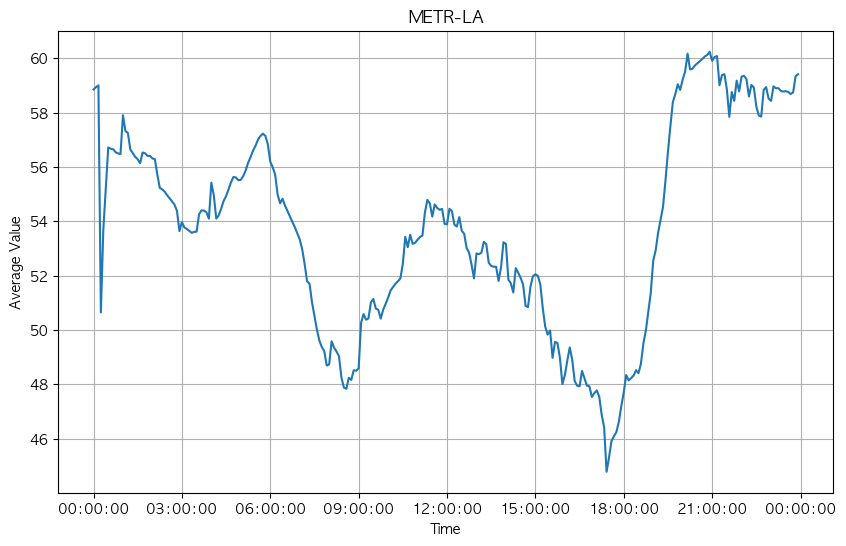

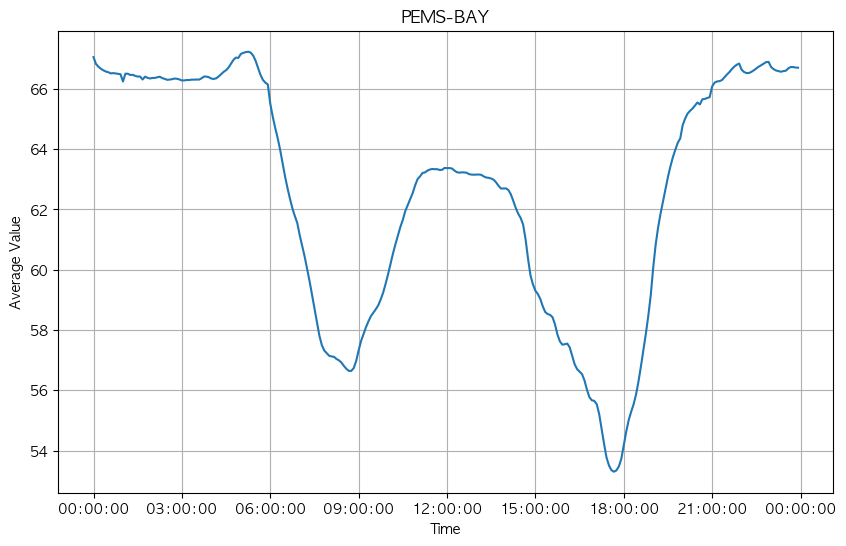

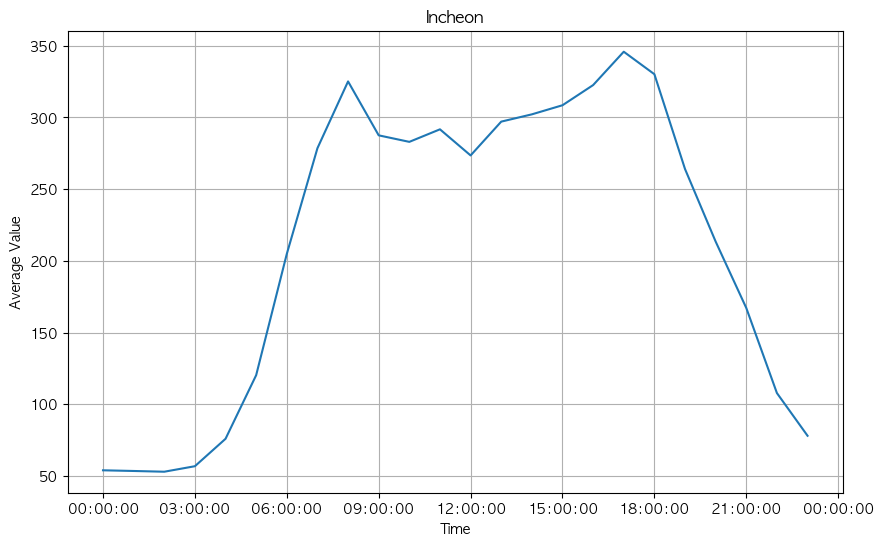

In [13]:
plot_by_time(df_la, "METR-LA")
plot_by_time(df_pems, "PEMS-BAY")
plot_by_time(df_imc, "Incheon")

In [14]:
def plot_by_days(df: pd.DataFrame, name: str):
    data_list = []

    for day in range(7):
        day_data = df[df.index.dayofweek == day]
        numeric_cols = day_data.select_dtypes(include=[np.number]).columns
        day_numeric = day_data[numeric_cols]
        values = day_numeric.values.flatten()
        values = values[~np.isnan(values)]
        df_day = pd.DataFrame({"Speed": values, "Days": day})
        data_list.append(df_day)

    df_all = pd.concat(data_list, ignore_index=True)

    # 요일 레이블 매핑
    day_labels = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
    df_all["Days"] = df_all["Days"].map(day_labels)
    df_all["Days"] = pd.Categorical(
        df_all["Days"],
        categories=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
        ordered=True,
    )

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x="Days",
        y="Speed",
        data=df_all,
        order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    )
    plt.xlabel("Days")
    plt.ylabel("Speed")
    plt.title(f"Data by Day in {name}")
    plt.grid(True)

    ax = plt.gca()
    formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
    ax.yaxis.set_major_formatter(formatter)
    
    plt.show()

2024/10/14 09:33:51 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024/10/14 09:33:54 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


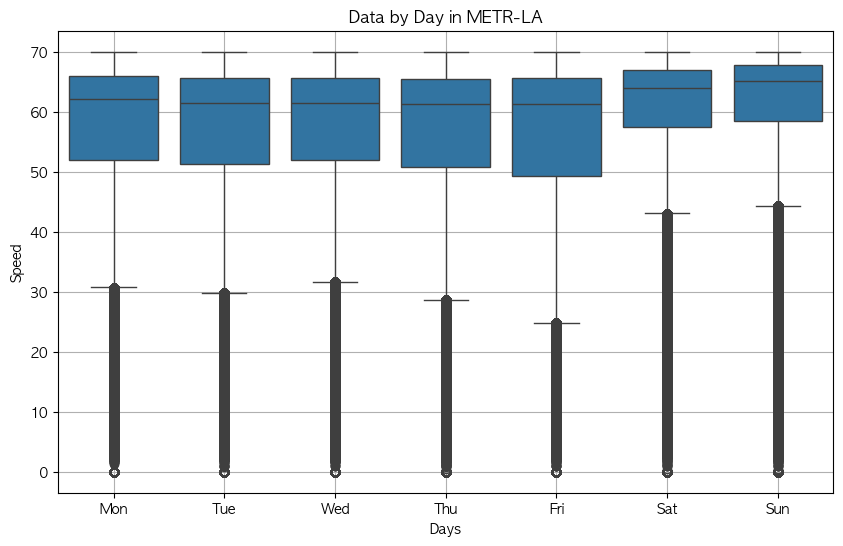

2024/10/14 09:33:58 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024/10/14 09:34:03 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


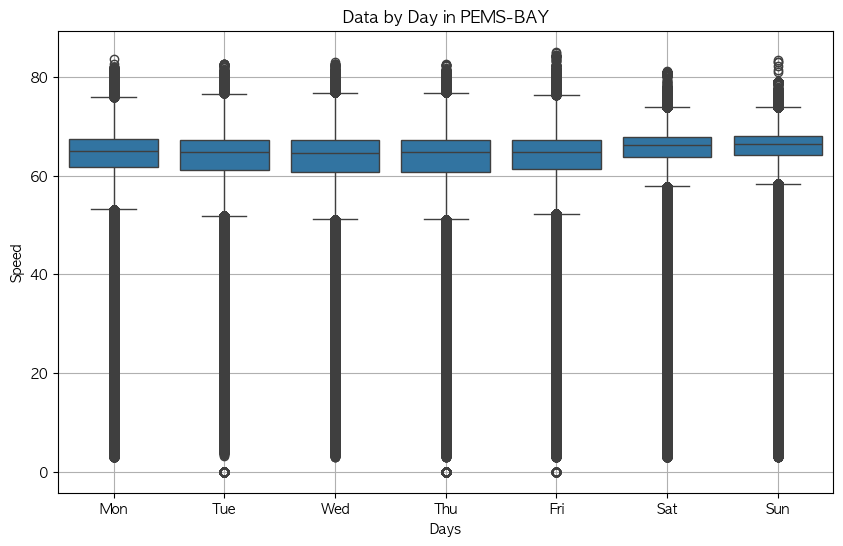

2024/10/14 09:34:09 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024/10/14 09:34:14 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


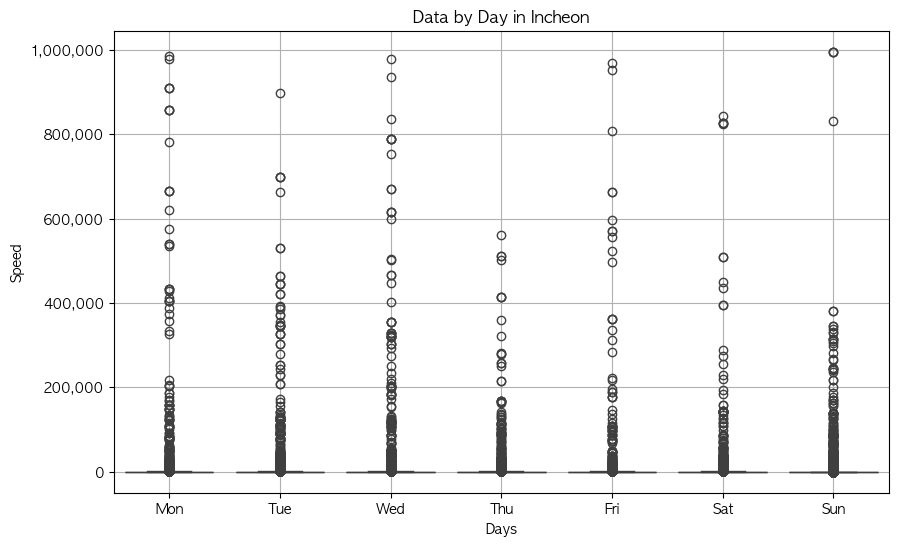

In [15]:
plot_by_days(df_la, "METR-LA")
plot_by_days(df_pems, "PEMS-BAY")
plot_by_days(df_imc, "Incheon")
# Lots of outliers in Incheon 

### Histogram

In [16]:
def plot_hist(
    df: pd.DataFrame,
    name: str,
    exclude_zero: bool = False,
    y_max: float = None,
    x_max: float = None,
    bins: int = 50,
):
    values = df.values.flatten()
    values = values[~np.isnan(values)]

    if exclude_zero:
        values = values[values != 0]

    if x_max is not None:
        bin_edges = np.histogram_bin_edges(
            values, bins=bins, range=(values.min(), x_max)
        )
        bin_edges = np.append(bin_edges, np.inf)
    else:
        bin_edges = bins

    plt.figure(figsize=(10, 6))
    sns.histplot(values, bins=bin_edges, kde=True)
    plt.xlabel("Value")
    plt.title(f"Histogram of {name}")
    plt.grid(True)

    if y_max is not None:
        plt.ylim(top=y_max)

    ax = plt.gca()
    formatter = FuncFormatter(lambda x, _: f"{int(x):,}")
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_formatter(formatter)

    plt.show()

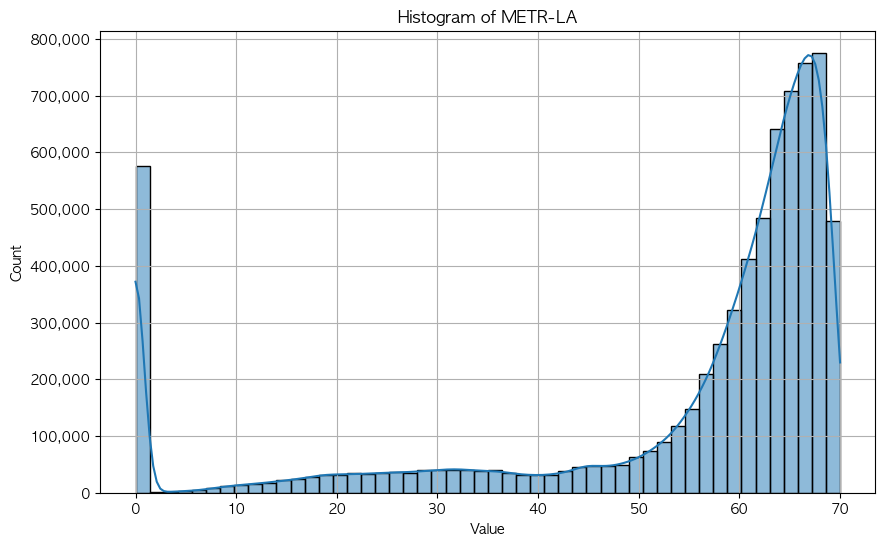

In [17]:
plot_hist(df_la, "METR-LA")

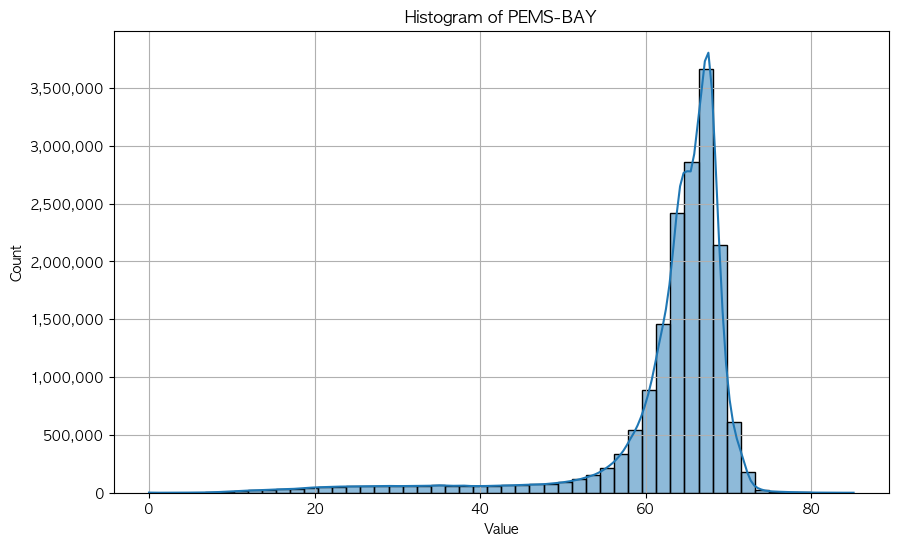

In [18]:
plot_hist(df_pems, "PEMS-BAY")

인천시 데이터의 경우 일반적인 한 방향의 도로에서 8000이상의 교통량은 불가능하다. 이에 따라 8000까지만 제한하여 시각화

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


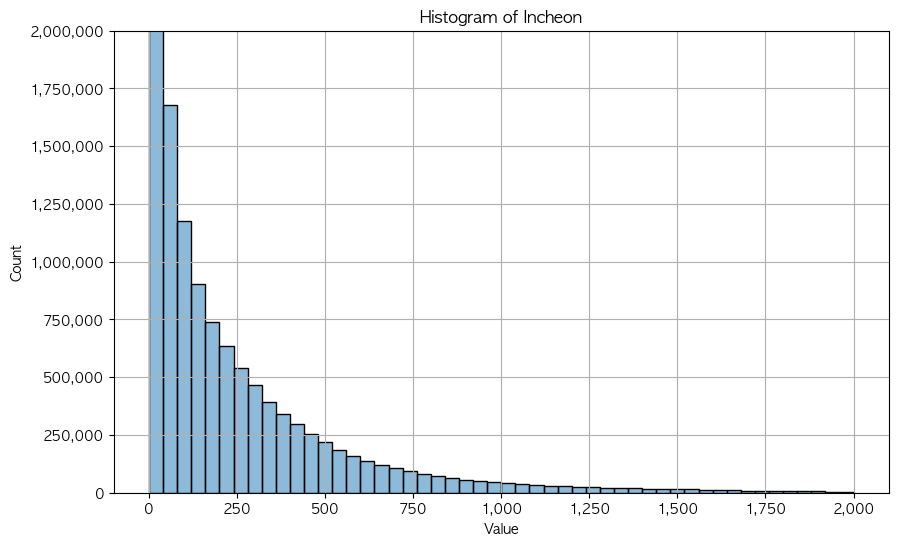

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


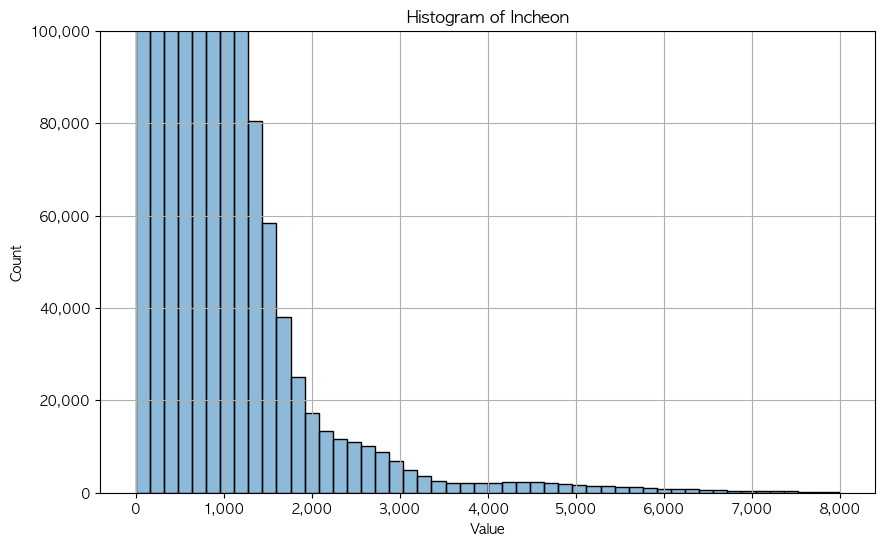

In [19]:
plot_hist(df_imc, "Incheon", y_max=2000000, x_max=2000)
plot_hist(df_imc, "Incheon", y_max=100000, x_max=8000)

## Inspection of Time-Series Data Structure and Samples

### Indexes

In [20]:
print("-- METR-LA\n", f"dtype: {df_la.index.dtype}\n", f"length: {len(df_la.index)}", end="\n\n")
print("-- PEMS-BAY\n", f"dtype: {df_pems.index.dtype}\n", f"length: {len(df_pems.index)}", end="\n\n")
print("-- Incheon\n", f"dtype: {df_imc.index.dtype}\n", f"length: {len(df_imc.index)}")

-- METR-LA
 dtype: datetime64[ns]
 length: 34272

-- PEMS-BAY
 dtype: datetime64[ns]
 length: 52116

-- Incheon
 dtype: datetime64[ns]
 length: 8784


In [21]:
print("METR-LA")
print("Is time series index:", isinstance(df_la.index, pd.DatetimeIndex))
print("Monotonic Increase:", df_la.index.is_monotonic_increasing)
print("Time Freq:", pd.infer_freq(df_la.index))
print()

print("PEMS-BAY")
print("Is time series index:", isinstance(df_pems.index, pd.DatetimeIndex))
print("Monotonic Increase:", df_pems.index.is_monotonic_increasing)
print("Time Freq:", pd.infer_freq(df_pems.index))
print()

print("Incheon")
print("Is time series index:", isinstance(df_imc.index, pd.DatetimeIndex))
print("Monotonic Increase:", df_imc.index.is_monotonic_increasing)
print("Time Freq:", pd.infer_freq(df_imc.index))
print()

METR-LA
Is time series index: True
Monotonic Increase: True
Time Freq: 5min

PEMS-BAY
Is time series index: True
Monotonic Increase: True
Time Freq: None

Incheon
Is time series index: True
Monotonic Increase: True
Time Freq: h



In [22]:
print("METR-LA")
time_diffs = df_la.index.to_series().diff()
time_diffs = time_diffs[1:]
gaps = time_diffs[time_diffs != pd.Timedelta(minutes=5)]

if gaps.empty:
    print("Index is 5-minutes interval")
else:
    print("Index is not 5-minutes interval")
    for idx in gaps.index:
        print(f"From: {df_la.index[df_la.index.get_loc(idx) - 1]}, To: {idx}")

print("\r\nPEMS-BAY")
time_diffs = df_pems.index.to_series().diff()
time_diffs = time_diffs[1:]
gaps = time_diffs[time_diffs != pd.Timedelta(minutes=5)]

if gaps.empty:
    print("Index is 5-minutes interval")
else:
    print("Index is not 5-minutes interval")
    for idx in gaps.index:
        print(f"From: {df_pems.index[df_pems.index.get_loc(idx) - 1]}, To: {idx}")

print("\r\nIncheon")
time_diffs = df_imc.index.to_series().diff()
time_diffs = time_diffs[1:]
gaps = time_diffs[time_diffs != pd.Timedelta(hours=1)]

if gaps.empty:
    print("Index is 1-hour interval")
else:
    print("Index is not 1-hour interval")
    for idx in gaps.index:
        print(f"From: {df_imc.index[df_imc.index.get_loc(idx) - 1]}, To: {idx}")

METR-LA
Index is 5-minutes interval

PEMS-BAY
Index is not 5-minutes interval
From: 2017-03-12 01:55:00, To: 2017-03-12 03:00:00

Incheon
Index is 1-hour interval


### Columns

In [23]:
print("-- METR-LA\n", f"dtype: {df_la.dtypes.unique().tolist()}\n", f"length: {len(df_la.columns)}", end="\n\n")
print("-- PEMS-BAY\n", f"dtype: {df_pems.dtypes.unique().tolist()}\n", f"length: {len(df_pems.columns)}", end="\n\n")
print("-- Incheon\n", f"dtype: {df_la.dtypes.unique().tolist()}\n", f"length: {len(df_imc.columns)}")

-- METR-LA
 dtype: [dtype('float64')]
 length: 207

-- PEMS-BAY
 dtype: [dtype('float64')]
 length: 325

-- Incheon
 dtype: [dtype('float64')]
 length: 2088


## Outliers in Incheon Data

앞서 살펴본 바에 따르면, 인천 데이터에는 다른 데이터에서는 볼 수 없는 Outlier가 많이 존재하며 비정상적인 값들이 많다. 이를 처리할 수 있는 방법이 필요하다.

In [24]:
idx = 0

In [25]:
def get_hourly_data(df: pd.DataFrame, col_idx: int):
    series = df.iloc[:, col_idx]
    groups = series.groupby(
        [
            series.index.hour,
            series.index.minute,
            series.index.second,
        ]
    )
    data = groups.apply(lambda x: x.reset_index(drop=True)).reset_index()

    data["Time"] = data["level_0"]
    col_name = df.columns[col_idx]
    data = data[["Time", col_name]]

    # 열 이름 변경
    data.columns = ["Time", "Value"]

    return data, col_name

In [26]:
def plot_iqr_outliers(df: pd.DataFrame, col_idx: int = 0):
    data, col_name = get_hourly_data(df, col_idx)

    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Time", y="Value", data=data)
    plt.title(f"Outliers in {col_name}")
    plt.show()

    return col_name

In [27]:
def plot_zscore_outliers(df: pd.DataFrame, col_idx: int = 0, z_threshold: float = 3.5):
    data, col_name = get_hourly_data(df, col_idx)
    
    error_band = []
    for hour in range(24):
        series = data[data["Time"] == hour]["Value"]
        mean = series.mean()
        std = series.std()
        
        lower_bound = mean - z_threshold * std
        upper_bound = mean + z_threshold * std
        error_band.append({"Time": hour, "Mean": mean, "Lower": lower_bound, "Upper": upper_bound})
    
    error_band = pd.DataFrame(error_band)

    outlier_data = []
    for hour in range(24):
        series = data[data["Time"] == hour]["Value"]
        z_scores = stats.zscore(series, nan_policy="omit")
        outliers = series[np.abs(z_scores) > z_threshold]
        for value in outliers:
            outlier_data.append({"Time": hour, "Value": value})
    
    outlier_data = pd.DataFrame(outlier_data)

    plt.figure(figsize=(12, 6))
    
    sns.lineplot(x="Time", y="Value", data=data, label="Average Value")
    plt.fill_between(
        error_band["Time"],
        error_band["Lower"],
        error_band["Upper"],
        color="gray",
        alpha=0.3,
        label=f"Z-Score Range ±{z_threshold}"
    )
    
    if not outlier_data.empty:
        sns.scatterplot(x="Time", y="Value", data=outlier_data, color="red", label="Outliers")
    
    plt.xlabel("Time")
    plt.ylabel(col_name)
    plt.title(f"Z-Score ±{z_threshold} Range for {col_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
z_score_threshold = 5

In [29]:
idx += 1

2024/10/14 09:35:06 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024/10/14 09:35:06 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


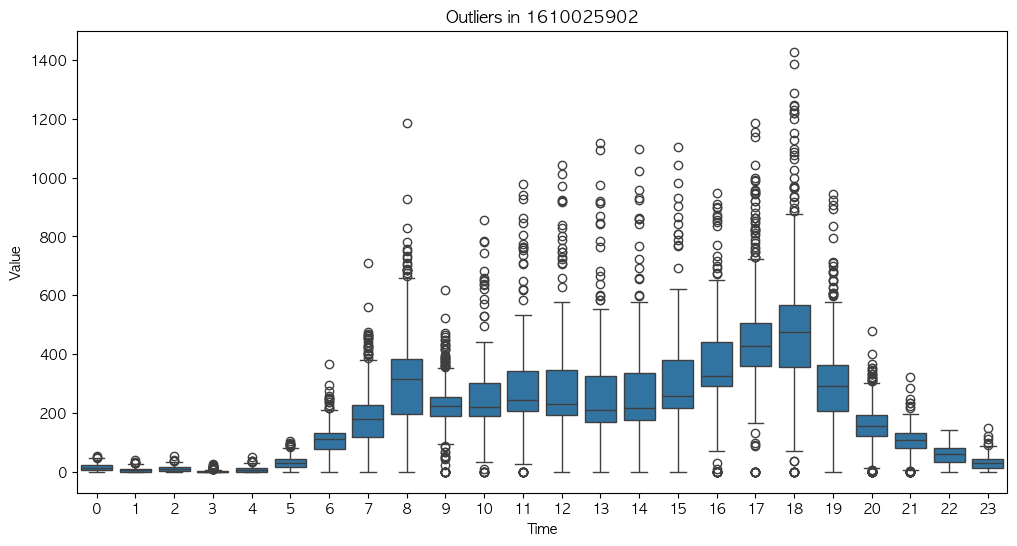

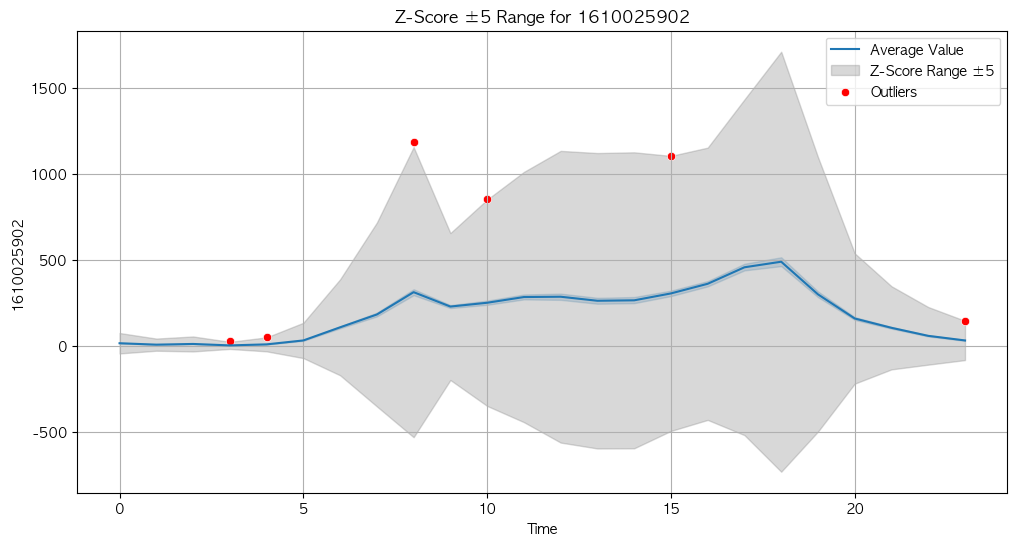

In [30]:
col_name = plot_iqr_outliers(df_imc, idx)
plot_zscore_outliers(df_imc, idx, z_threshold=z_score_threshold)


### Outlier 처리

이상적인 차선 하나 당 이론적 최대 통행량은 다음과 같다.

1. 제한속도 100km/h: 2200대
3. 제한속도 80km/h: 2000대
5. 제한속도 60km/h: 1800대

즉, 10km/h 줄어들때마다 100대씩 줄어든다. 이를 기준으로 다시 분석한다.

참조:
오영태, 김수희, 정성환, & 함태식. (2008). 국내ㆍ외 고속도로 용량산정방법 비교ㆍ분석 연구. 한국 ITS 학회 학술대회, 29-36.

#### 제한속도 별 도로 분류 및 통행량 분석

In [31]:
max_speed_map = imc_metadata.set_index("LINK_ID")["MAX_SPD"].to_dict()

grouped_columns: Dict[int, List[str]] = {}
for col in df_imc.columns:
    if col in max_speed_map:
        max_speed = max_speed_map[col]
        if max_speed not in grouped_columns:
            grouped_columns[max_speed] = []
        grouped_columns[max_speed].append(col)

grouped_df_imc = {speed: df_imc[cols] for speed, cols in grouped_columns.items()}

In [32]:
speed_limit_list = sorted(grouped_df_imc.keys())
speed_limit_list

[30, 40, 50, 60, 70, 80, 100]

In [33]:
def get_ideal_road_max_flow(key: int, allow_rate: float = 0.1):
    return (2200 - 10 * (100 - key)) * (allow_rate + 1)

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


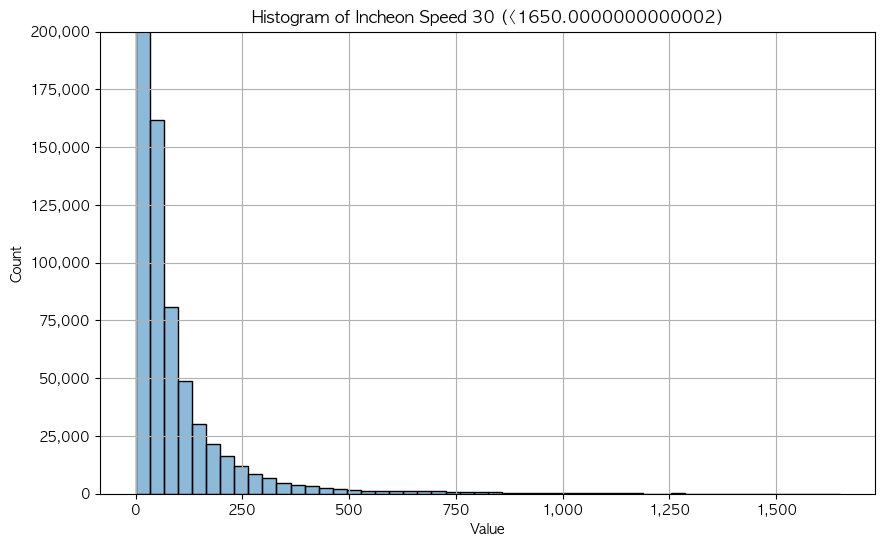

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2
/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:482: RuntimeWarning: invalid value encountered in multiply
  hist_norm = (heights * widths).sum()


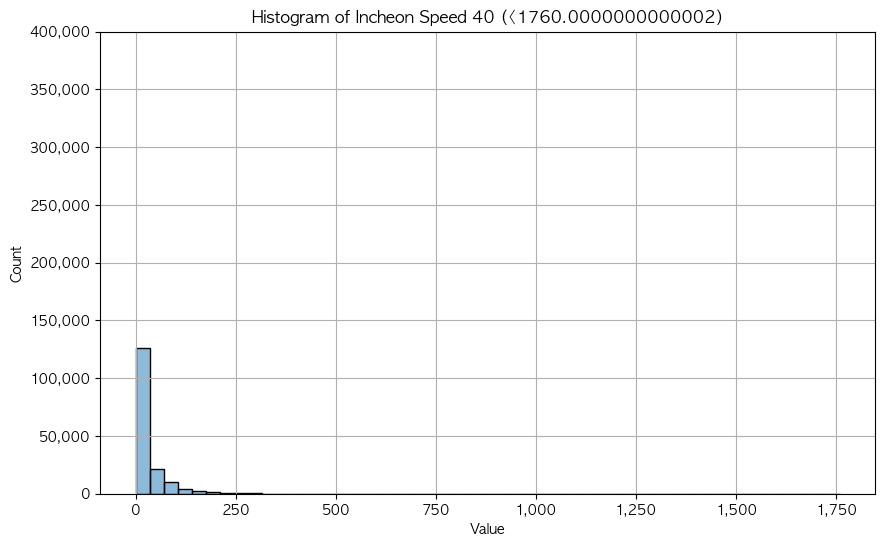

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


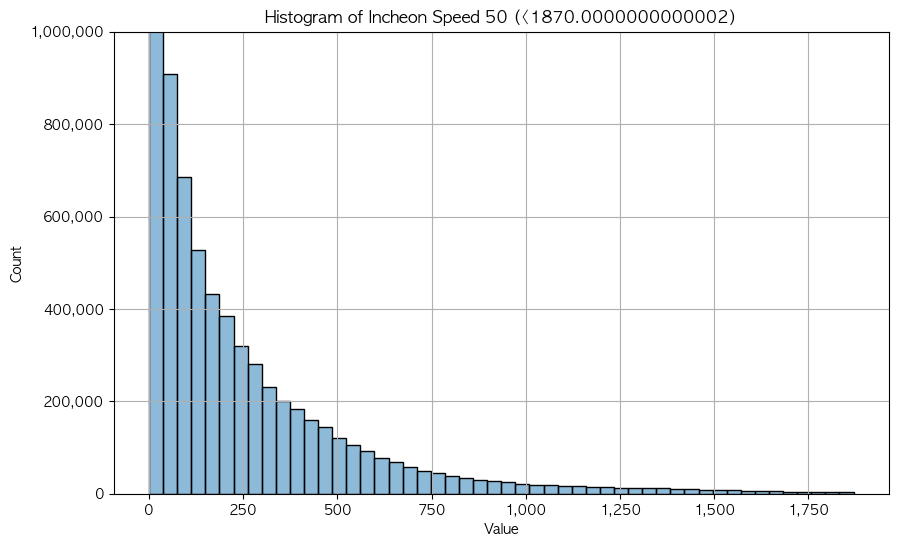

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


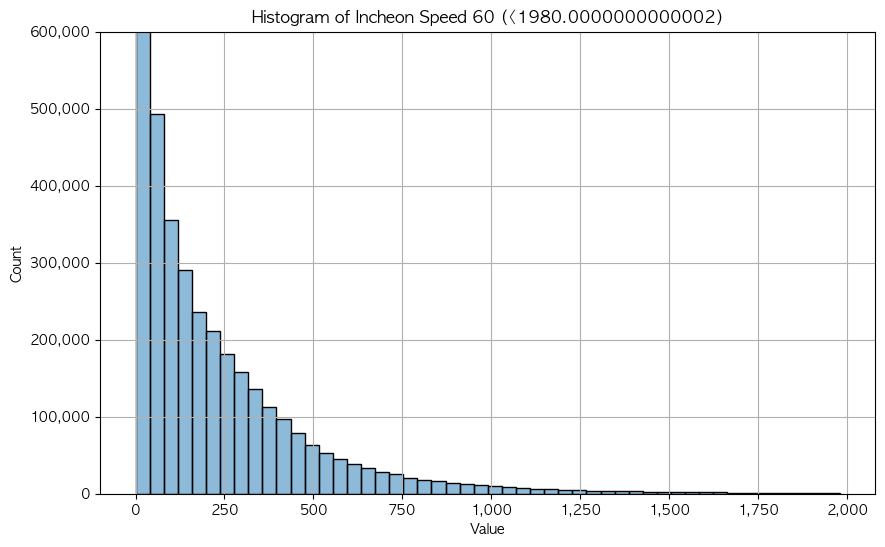

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


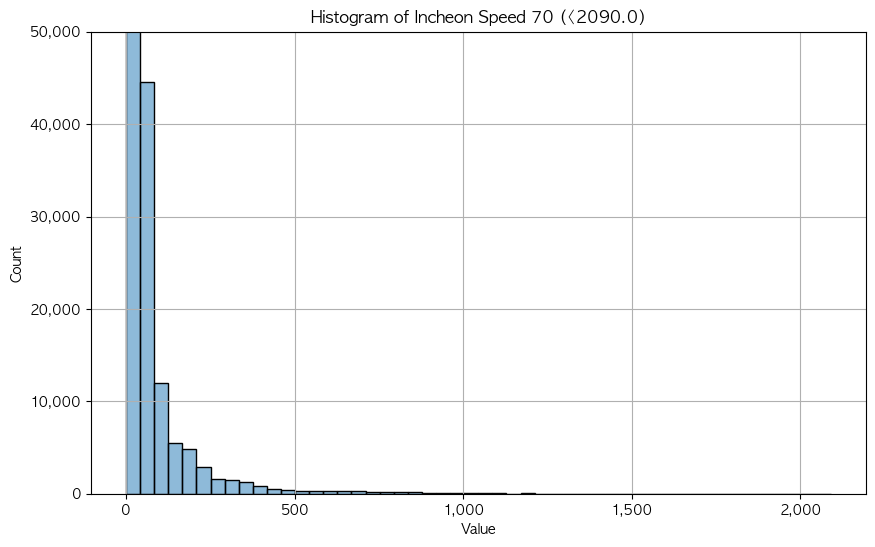

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


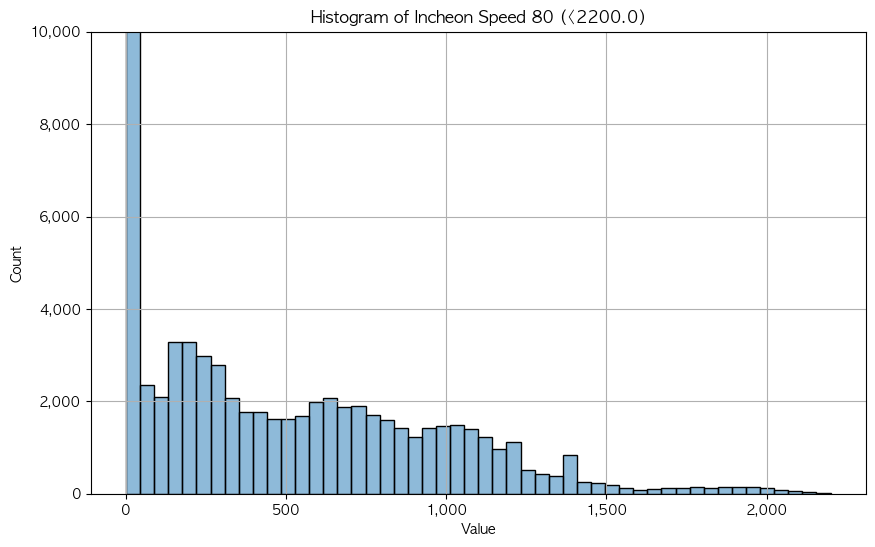

/Users/sbyim/Workspace/Python/songdo-traffic/notebooks/.venv/lib/python3.11/site-packages/seaborn/distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


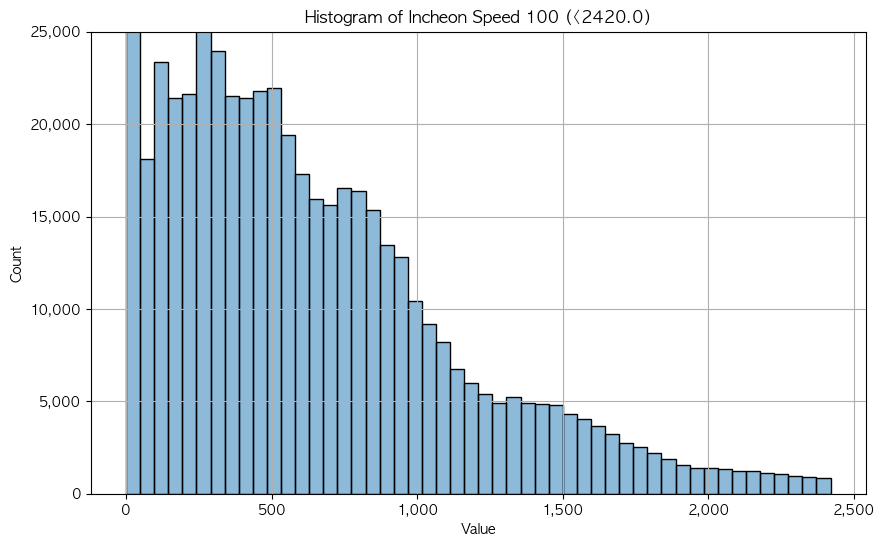

In [34]:
y_maxes = {100: 25000, 80: 10000, 70: 50000, 60: 600000, 50: 1000000, 40: 400000, 30: 200000}
for key in speed_limit_list:
    x_max = get_ideal_road_max_flow(key)
    plot_hist(grouped_df_imc[key], f"Incheon Speed {key} (<{x_max})", y_max=y_maxes[key], x_max=x_max)

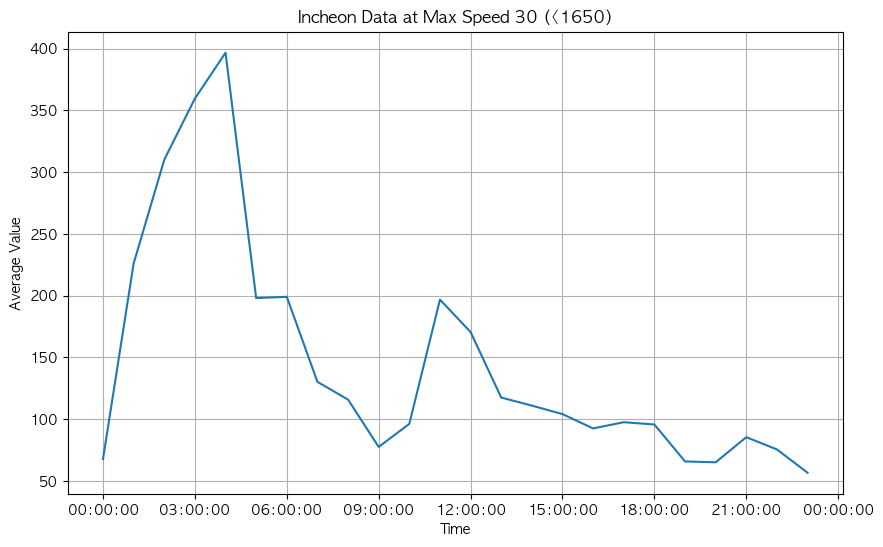

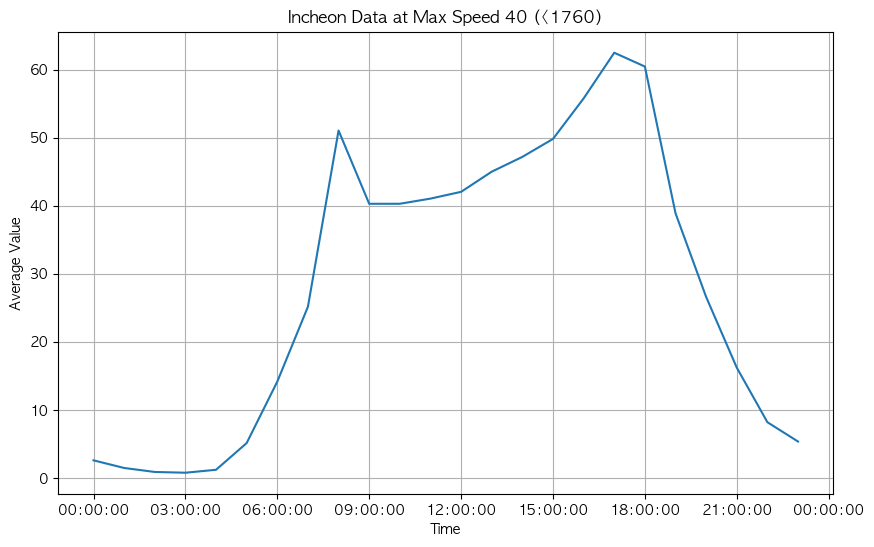

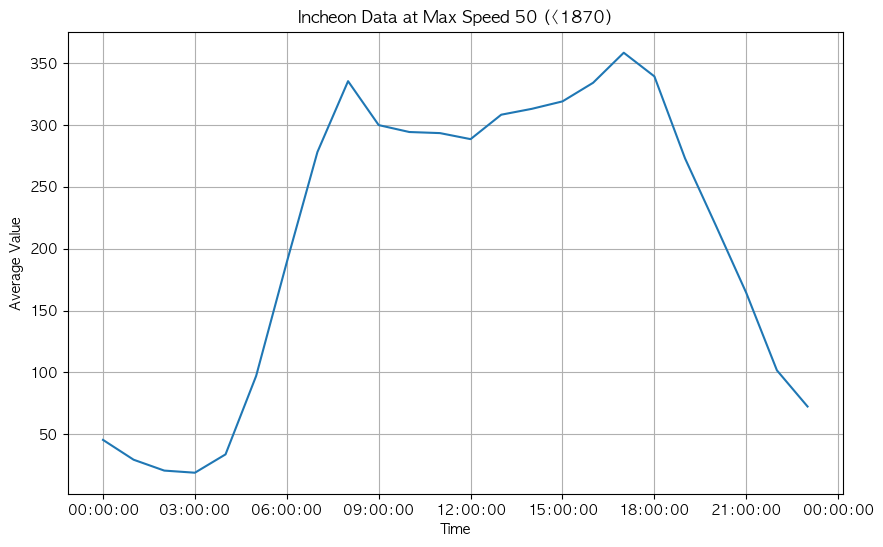

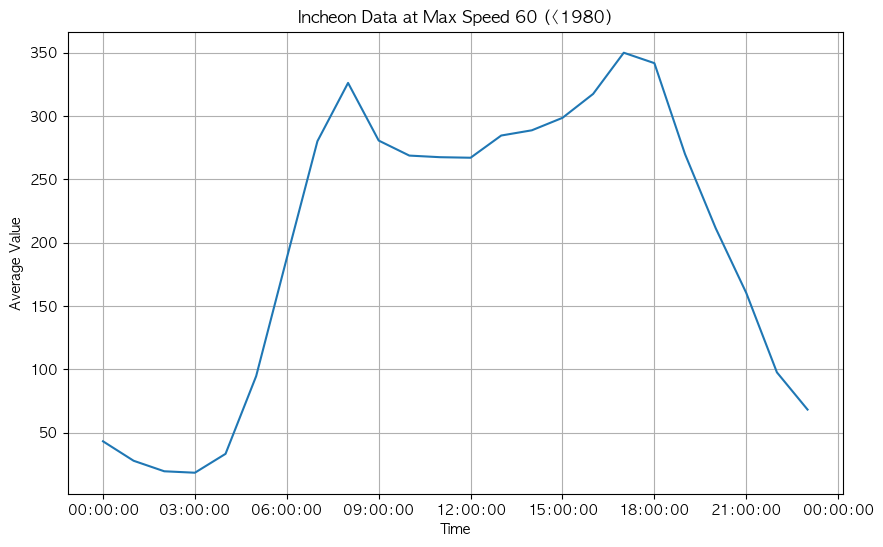

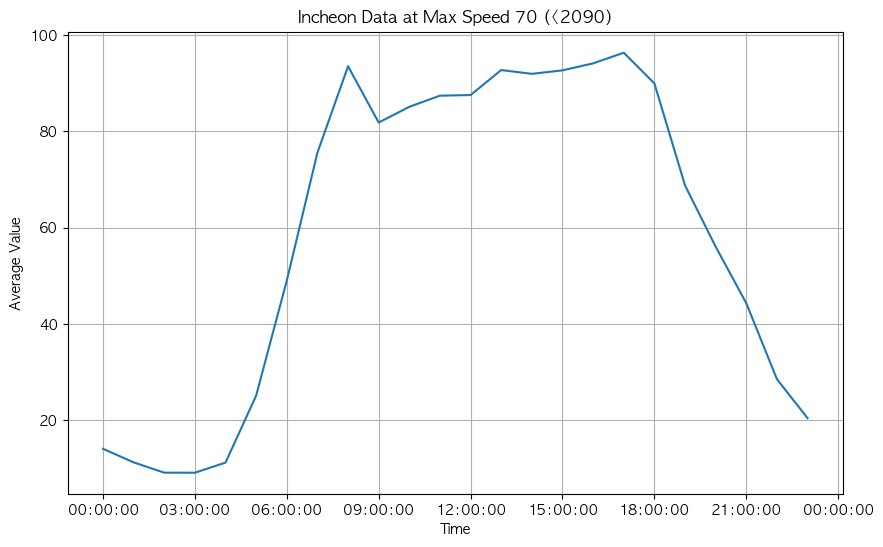

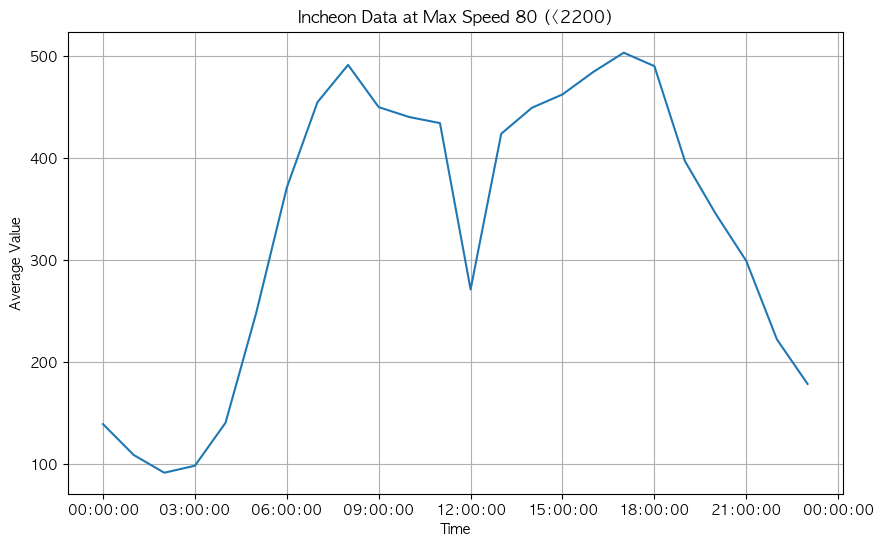

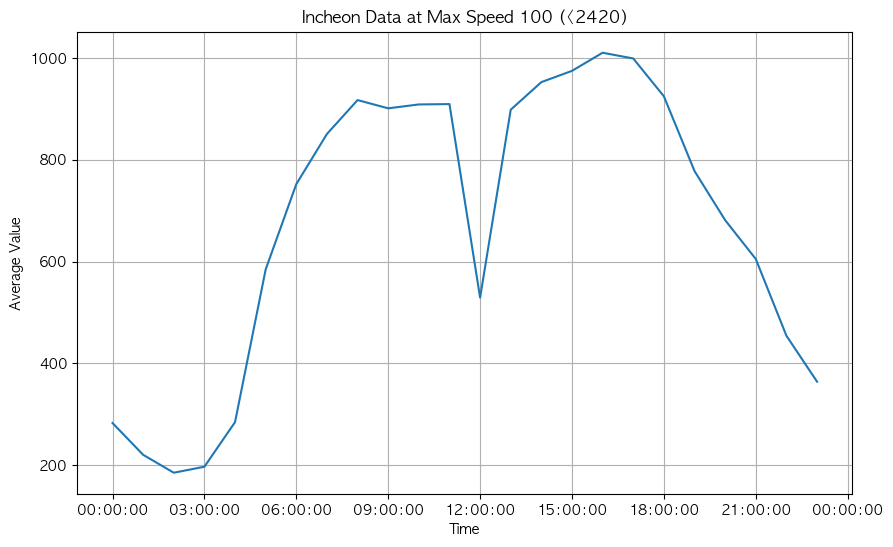

In [35]:
for key in speed_limit_list:
    x_max = get_ideal_road_max_flow(key)
    plot_by_time(grouped_df_imc[key], f"Incheon Data at Max Speed {key} (<{x_max:.0f})")

#### 제한속도 별 이상치 있는 센서 시각화

명백한 이상치가 있는 센서의 데이터를 시각화하고 어떤 문제가 있는지 분석

In [77]:
z_score_threshold = 5
# [30, 40, 50, 60, 70, 80, 100]
target_max_speed = 50
idx = 0
allow_rate = 1.5

# ----- #

target_df_imc_group = grouped_df_imc[target_max_speed]
prev_idx = idx
prev_sensor = "None"
expected_road_max = get_ideal_road_max_flow(target_max_speed)
expected_road_max = expected_road_max * allow_rate

Max Speed: 50 km/h, Max Ideal Flow: 2805.0000000000005
Previous Sensor(0: None) => Current Sensor(23: 1650057200)


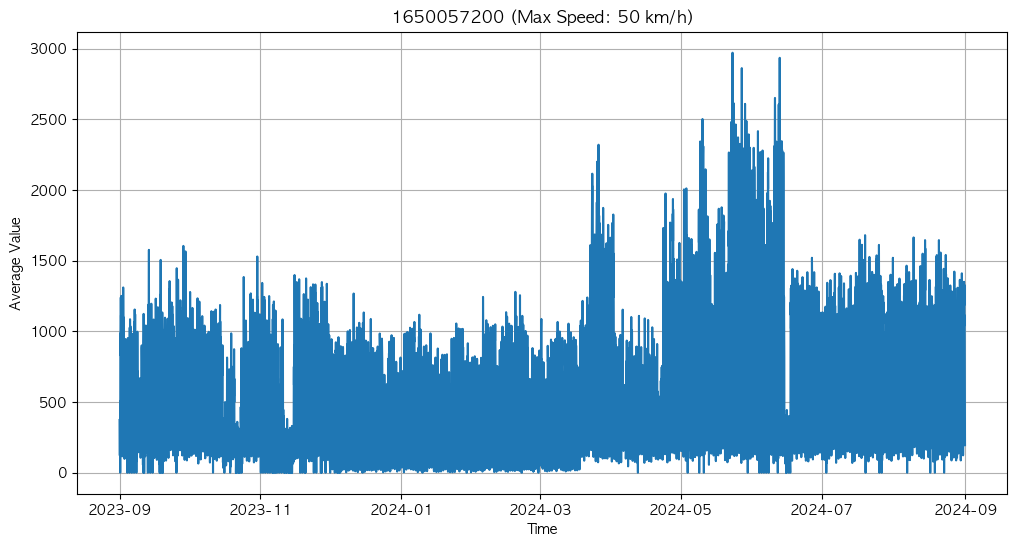

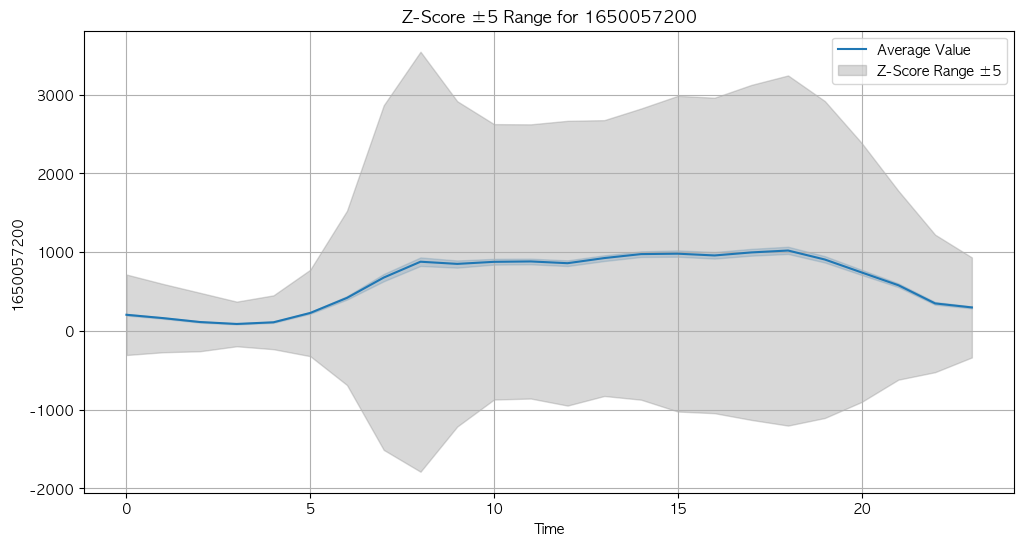

In [78]:
while True:
    if idx >= len(target_df_imc_group.columns):
        idx =- 1
        print("End of the dataset")
        break
        
    target_sensor_data = target_df_imc_group.iloc[:, idx]
    values = target_sensor_data.values.flatten()
    values = values[~np.isnan(values)]

    if (values > expected_road_max).sum() > 0:
        print(f"Max Speed: {target_max_speed} km/h, Max Ideal Flow: {expected_road_max}")
        print(f"Previous Sensor({prev_idx}: {prev_sensor}) => Current Sensor({idx}: {target_sensor_data.name})")

        plt.figure(figsize=(12, 6))
        sns.lineplot(x=target_sensor_data.index, y=target_sensor_data.values)

        plt.xlabel("Time")
        plt.ylabel("Average Value")
        plt.title(f"{target_sensor_data.name} (Max Speed: {target_max_speed} km/h)")

        plt.grid(True)
        
        plt.show()

        plot_zscore_outliers(target_df_imc_group, idx, z_threshold=z_score_threshold)
        prev_idx = idx
        prev_sensor = target_sensor_data.name

        idx += 1
        break
    
    idx += 1

# ----- #

target_sensor_position: gpd.GeoDataFrame = roads_imc[
    roads_imc["LINK_ID"] == prev_sensor
]
target_sensor_position.explore(
    color="blue",
    style_kwds={"style_function": lambda _: {"radius": 10}},
)

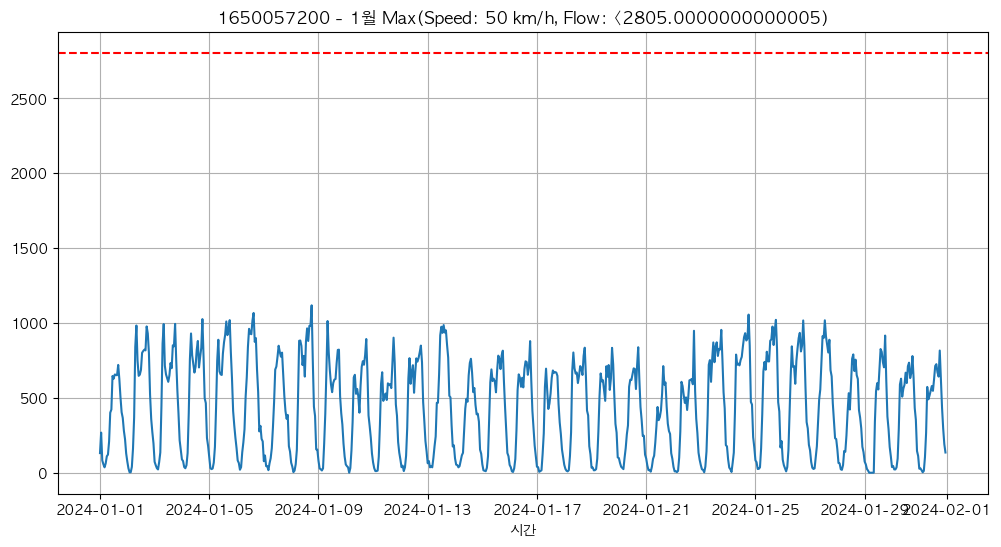

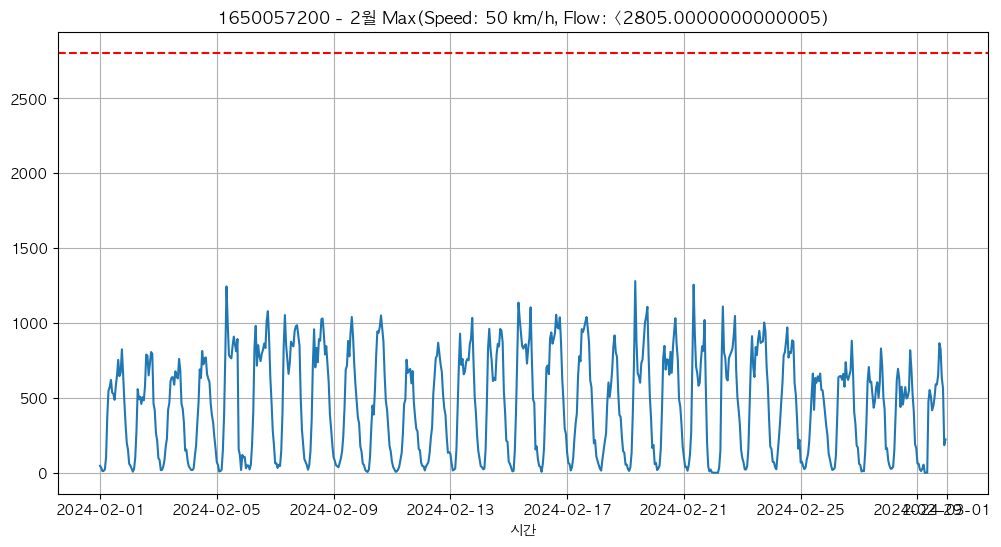

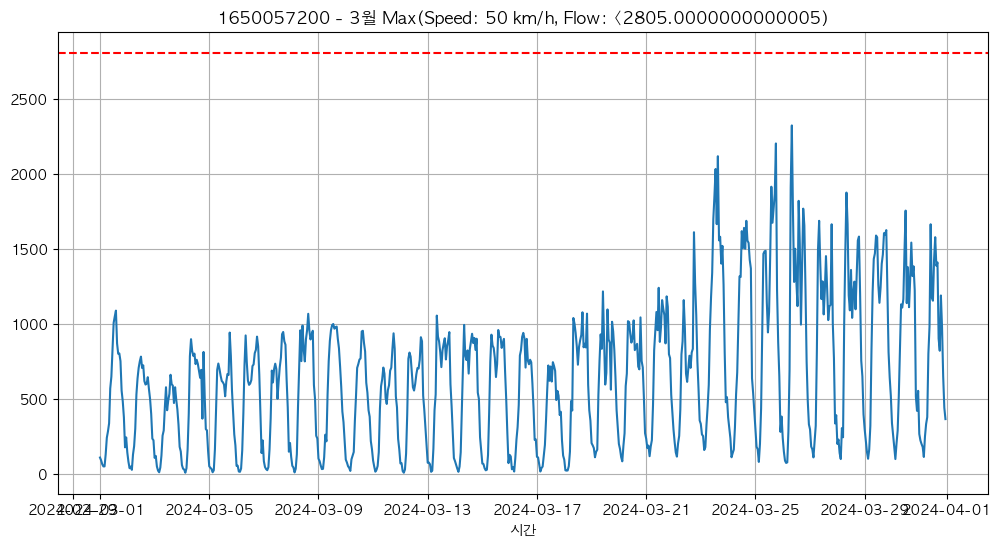

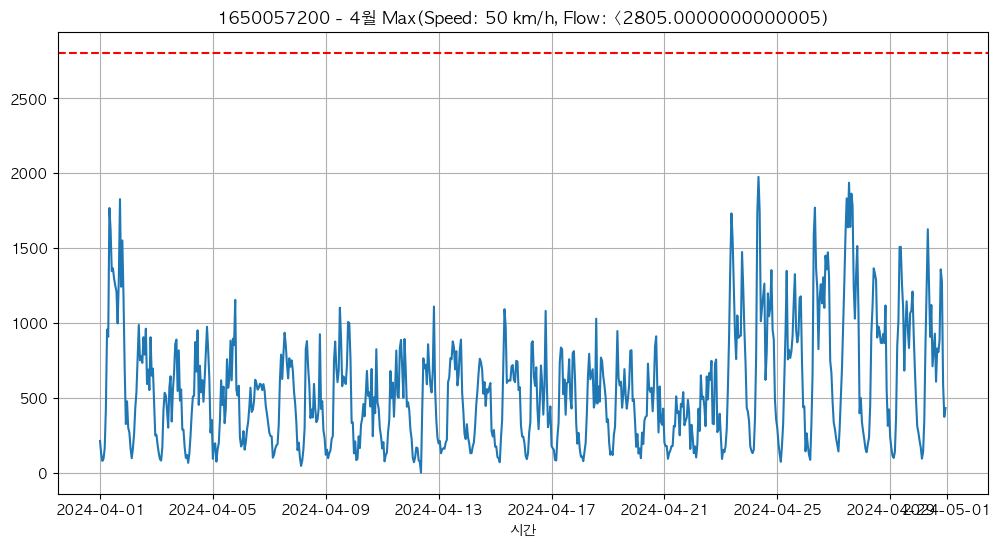

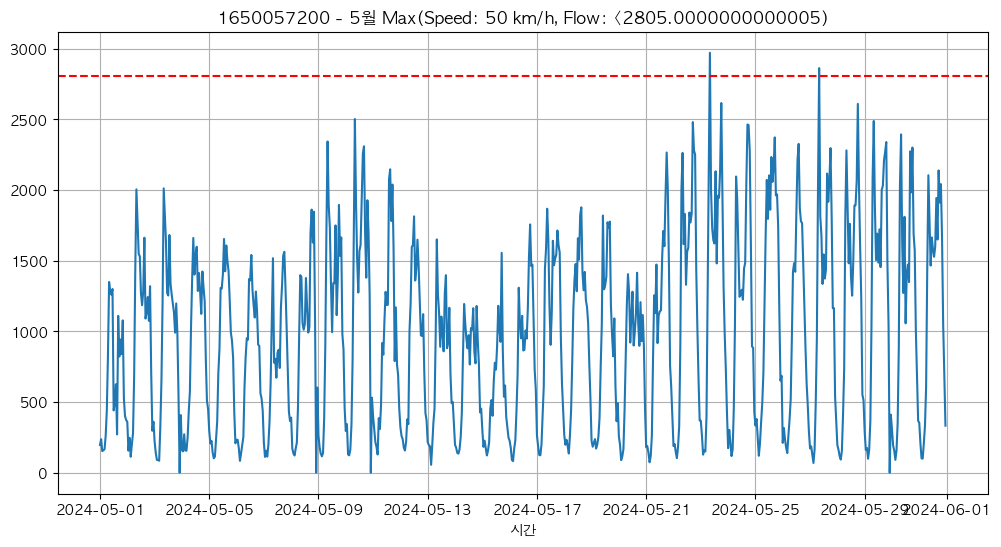

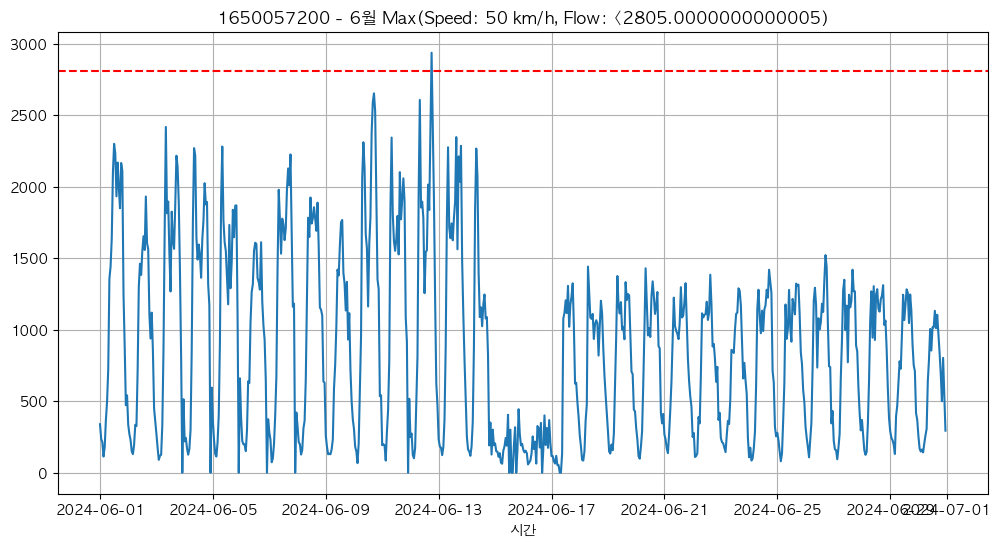

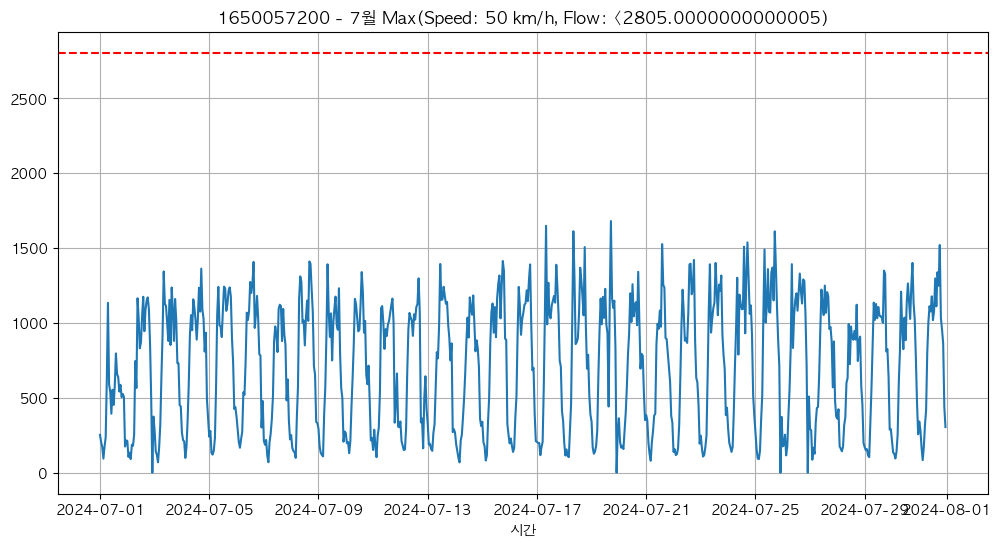

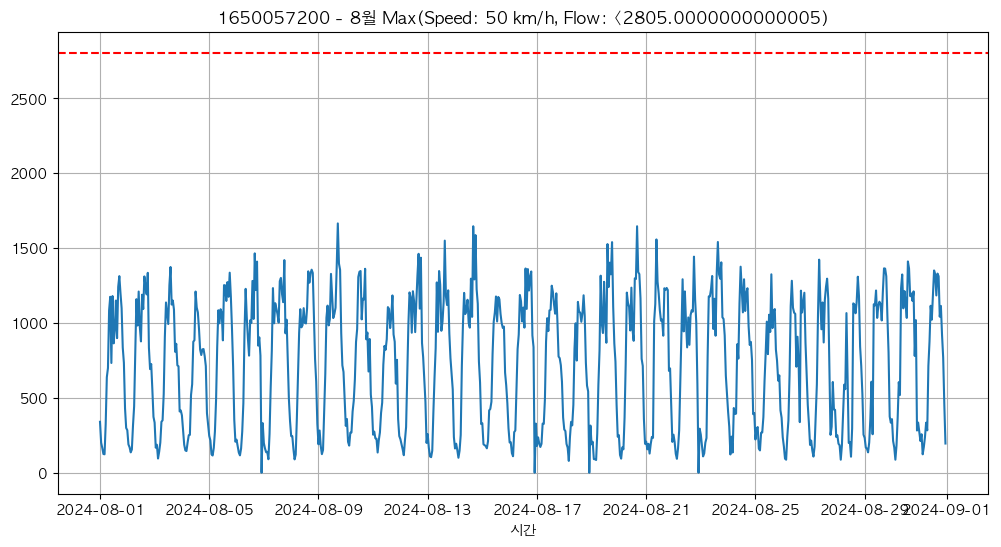

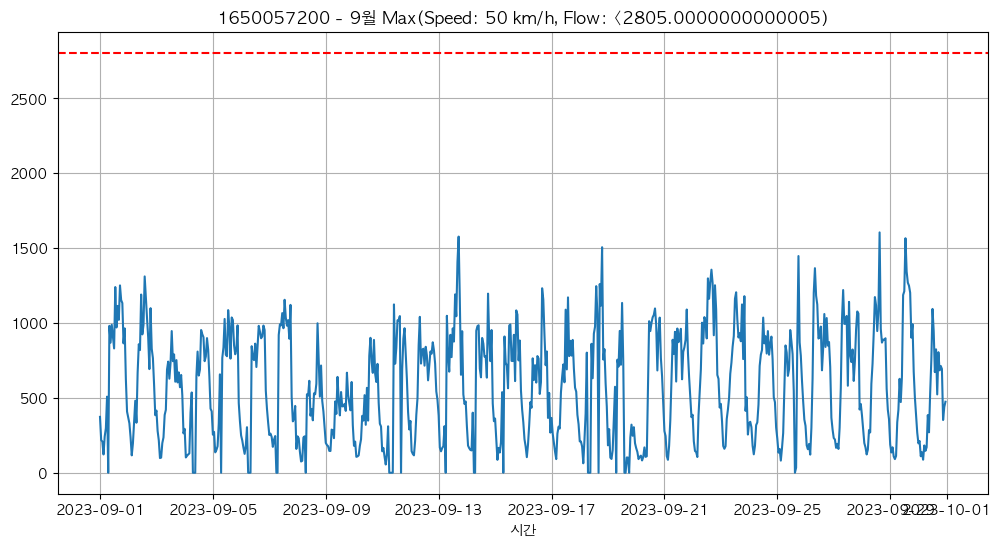

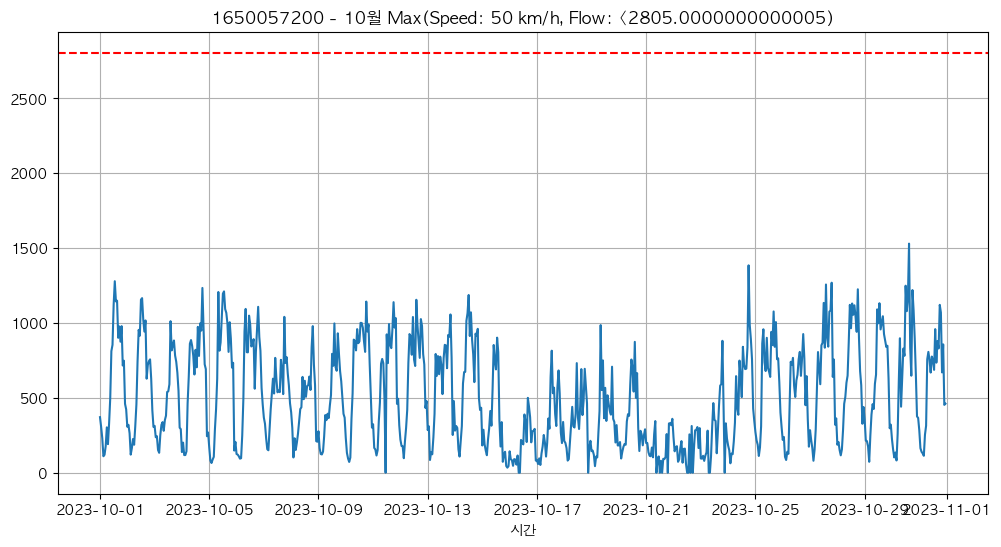

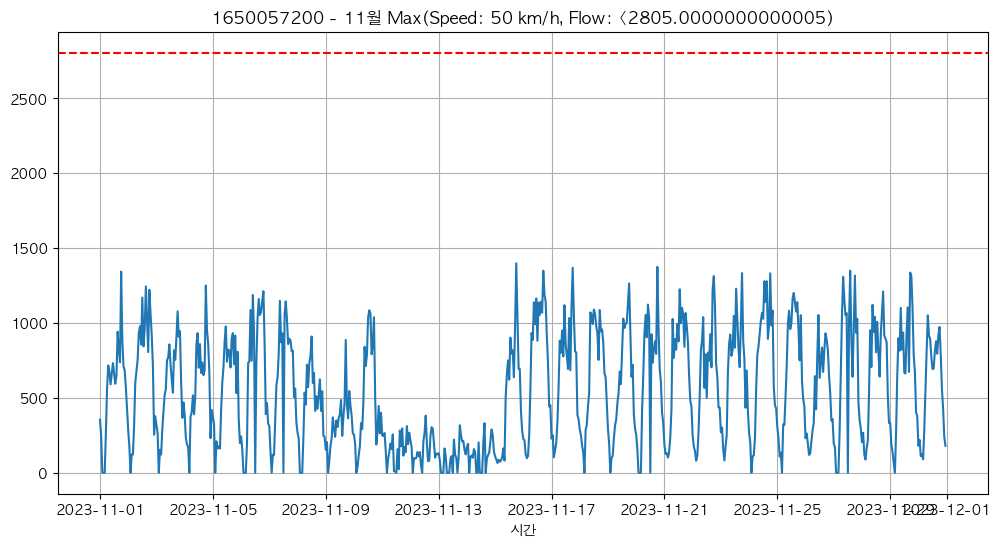

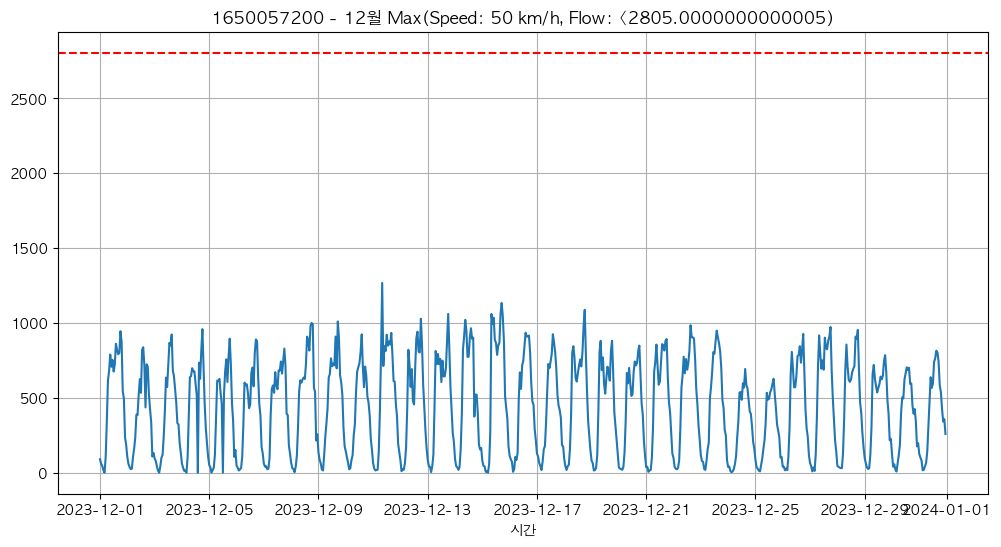

In [79]:
month_names_korean = [
    "1월",
    "2월",
    "3월",
    "4월",
    "5월",
    "6월",
    "7월",
    "8월",
    "9월",
    "10월",
    "11월",
    "12월",
]
months = sorted(target_sensor_data.index.month.unique())

for month in months:
    month_data = target_sensor_data[target_sensor_data.index.month == month]
    month_name = month_names_korean[month - 1]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x=month_data.index, y=month_data.values)
    plt.axhline(
        y=expected_road_max,
        color="red",
        linestyle="--",
        label=f"Ideal Road Max: {expected_road_max}",
    )

    plt.xlabel("시간")
    plt.title(
        f"{target_sensor_data.name} - {month_name} Max(Speed: {target_max_speed} km/h, Flow: <{expected_road_max})"
    )

    plt.grid(True)
    plt.show()

Outlier 기준은 다음과 같다.

1. 10000 이상의 값은 비정상으로 인식
2. z-score 5 이상은 비정상으로 인식

In [80]:
from metr.components.metr_imc.outlier import AbsoluteOutlierProcessor, HourlyInSensorOutlierProcessor

outlier_proc_1 = AbsoluteOutlierProcessor(threshold=10000)
outlier_proc_2 = HourlyInSensorOutlierProcessor(threshold=z_score_threshold)

In [81]:
metr_imc.reset_data()
metr_imc.remove_outliers([outlier_proc_1, outlier_proc_2])
df_imc_outliers_removed = metr_imc.data

2024/10/14 11:18:43 metr.components.metr_imc.traffic_data [INFO] Process Outlier for METR-IMC Traffic data...


Processing with AbsoluteOutlierProcessor...
Outliers removed: 1660041701    0
1610025902    0
1680058906    0
1660001801    0
1660022100    0
             ..
1650001102    0
1670153700    0
1640009500    0
1650225300    0
1660030901    0
Length: 2088, dtype: int64
Processing with HourlyInSensorOutlierProcessor...


2024/10/14 11:18:44 metr.components.metr_imc.traffic_data [INFO] Processing Complete


Outliers removed: 1660041701     0
1610025902    13
1680058906     0
1660001801     0
1660022100     7
              ..
1650001102     0
1670153700    29
1640009500    27
1650225300    61
1660030901    17
Length: 2088, dtype: int64


2024/10/14 11:19:01 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024/10/14 11:19:01 matplotlib.category [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


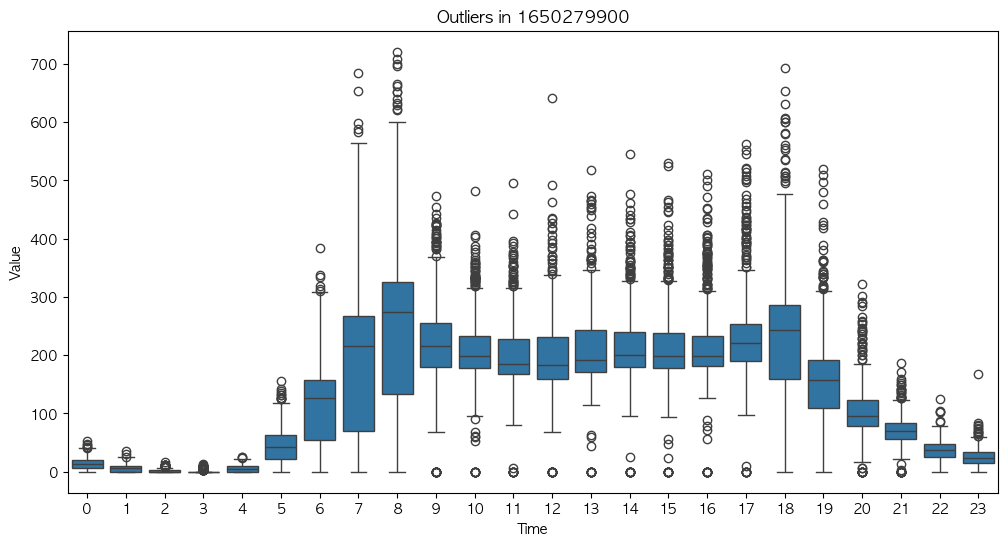

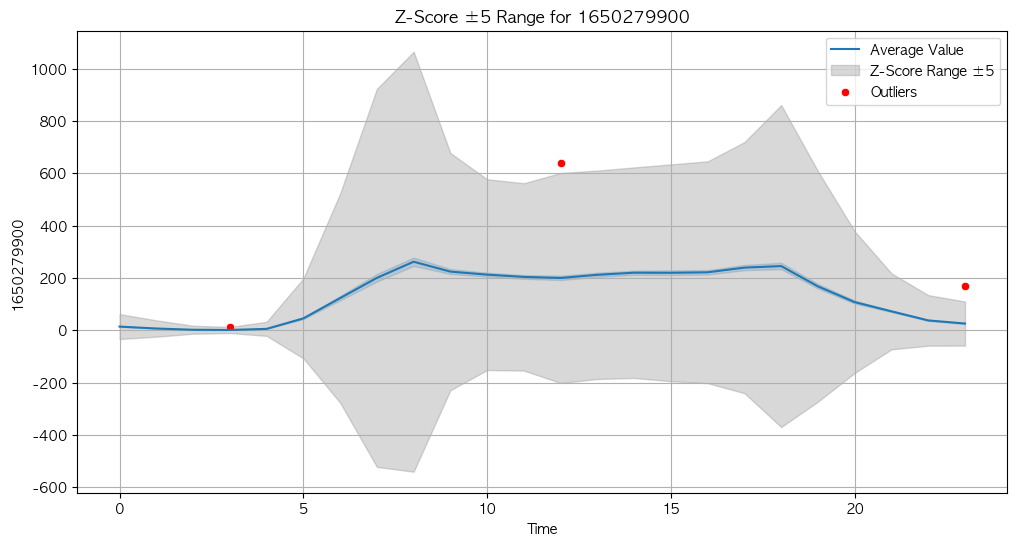

In [82]:
plot_iqr_outliers(df_imc_outliers_removed, idx)
plot_zscore_outliers(df_imc_outliers_removed, idx, z_threshold=z_score_threshold)

In [83]:
sensor_name = col_name
print(df_imc[sensor_name][df_imc[sensor_name] > 10000])
print("IMC:", df_imc[sensor_name].count())
print("IMC_NoOut:", df_imc_outliers_removed[sensor_name].count())


Series([], Freq: h, Name: 1610025902, dtype: float32)
IMC: 8496
IMC_NoOut: 8483


## Missing Data in Incheon Data

In [ ]:
def count_columns_by_missing_range(df: pd.DataFrame):
    total_cols = len(df.columns)
    no_missing = len(df.columns[df.isnull().sum() == 0])
    missing_1_to_100 = len(df.columns[(df.isnull().sum() > 0) & (df.isnull().sum() <= 100)])
    missing_101_to_500 = len(df.columns[(df.isnull().sum() > 100) & (df.isnull().sum() <= 500)])
    missing_501_to_750 = len(df.columns[(df.isnull().sum() > 500) & (df.isnull().sum() <= 750)])
    missing_751_above = len(df.columns[df.isnull().sum() > 750])

    print(f"   Total Columns: {total_cols}")
    print(f"   No Missing: {no_missing}")
    print(f"   1 to 100 Missing: {missing_1_to_100}")
    print(f"   101 to 500 Missing: {missing_101_to_500}")
    print(f"   501 to 750 Missing: {missing_501_to_750}")
    print(f"   751 or more Missing: {missing_751_above}")

# METR-LA
print("-- METR-LA")
count_columns_by_missing_range(df_la)
print()

# PEMS-BAY
print("-- PEMS-BAY")
count_columns_by_missing_range(df_pems)
print()

# Incheon
print("-- Incheon")
count_columns_by_missing_range(df_imc)
print()

#### Visualization of Missing Data

In [31]:
def visualize_missingno(df: pd.DataFrame):
    msno.matrix(df)
    plt.show()

    msno.heatmap(df, labels=False)
    plt.show()

    msno.bar(df)
    plt.show()

In [ ]:
df_temp = df_imc_outliers_removed[df_imc_outliers_removed.isnull().sum(axis=1) > 500]
df_temp.shape

In [ ]:
df_temp

In [ ]:
visualize_missingno(df_temp)

------------------------------------------------------------------------------------------------

missingno는 결측값 시각화 패키지이며 각 함수는 다음의 의미와 같다.
1. matrix: 빈 공간은 결측값을 나타내며 이를 통해 결측 패턴을 파악.
2. heatmap: 열 간 결측값 상관 계수를 히트맵으로 표시. 변수 간 결측값의 연관성 파악.
3. bar: 결측값 갯수를 막대로 표시. 각 열(변수)의 결측값 갯수 파악.

In [ ]:
sample_rate = 0.1

data_columns = df_imc_sorted.columns
num_columns_to_select = int(len(data_columns) * sample_rate)
selected_columns = np.random.choice(data_columns, num_columns_to_select, replace=False)
sampled_df = df_imc_sorted[selected_columns]

print(f"샘플링된 데이터 프레임의 크기: {sampled_df.shape}")
visualize_missingno(sampled_df)

Matrix에서 특정 날짜에서 결측값이 많아지는 경향을 볼 수 있다. 특히 데이터 시작 부분의 일정 기간 동안 결측값이 많이 관찰되었다. 특정 날짜에서 대부분의 센서들이 동작하지 않았을 가능성이 높다. 또한, 데이터 시작 부분의 데이터는 제외하는 것을 고려할 수 있다.

Heatmap 분석에서는 결측값의 상관관계가 높은 경우가 많이 확인되었다. 일반적으로 이 경우 결측값 형태가 MAR(Missing At Random)이라고 판단한다. 다만 각 열이 모두 독립적인 센서임을 감안할 때, 각 센서가 영향을 주었을 가능성은 낮고 중앙 시스템에서 문제가 됬을 가능성이 높기 때문에 이 점을 감안할 필요가 있다.

Bar 분석에서는 대부분 결측치가 많다는 것을 확인할 수 있다.

In [ ]:
sample_traffic_data = df_imc[df_imc.columns[df_imc.isnull().sum() == 0][0]]

plt.figure(figsize=(12, 2))
sns.lineplot(sample_traffic_data)
plt.title(f"{sample_traffic_data.name} Road Traffic Data")
plt.xlabel("Date Time")
plt.show()

최종적으로는 결측값을 포함한 전체 데이터셋을 기반으로 모델을 생성하고 성능을 평가해야 하지만 결측값 문제는 현재 집중하고 있는 연구 방향과는 독립적인 문제로 판단된다. 또한, 모든 데이터를 포함하면 데이터의 크기가 커져 학습 시간이 길어지는 문제도 있다. 따라서 현재는 데이터를 줄여 효율성을 높이고자 먼저 결측값이 없는 데이터를 사용하여 모델을 생성하고, 이 모델이 유효한지 판단한 후, 결측값 문제를 추가로 해결하는 방향으로 연구를 진행하고자 한다.

In [15]:
no_missing_columns = df_imc.columns[df_imc.isnull().sum() == 0].to_list()
less_500_missing_columns = df_imc.columns[df_imc.isnull().sum() < 500].to_list()
less_750_missing_columns = df_imc.columns[df_imc.isnull().sum() < 750].to_list()

In [16]:
import os
from songdo_metr.dataset.metr_imc.converter.graph_sensor_locations import SensorView

if not os.path.exists("../datasets/metr-imc/miscellaneous/no_missing.shp"):
    view = SensorView("../datasets/metr-imc/graph_sensor_locations.csv")
    view.set_filter(no_missing_columns)
    view.export_to_file("../datasets/metr-imc/miscellaneous", "no_missing.shp")
    view.set_filter(less_500_missing_columns)
    view.export_to_file("../datasets/metr-imc/miscellaneous", "missing_500.shp")
    view.set_filter(less_750_missing_columns)
    view.export_to_file("../datasets/metr-imc/miscellaneous", "missing_750.shp")

결측치가 없는 데이터를 사용하는 것이 가장 이상적이지만, 이 경우 노드의 수가 너무 줄어들어 공간 정보가 모델에 충분히 반영되지 않을 가능성이 있다. 따라서, 기존에 많이 사용하는 METR-LA, PEMS-BAY 등의 데이터셋 크기와 유사한 수준으로 조정하였다. 결측치 허용 기준을 여러 개 비교한 결과, 500 정도가 기존 데이터셋과 유사한 크기를 유지하면서도 공간 정보를 적절히 반영할 수 있을 것으로 예상되었다.

- 결측치가 하나도 없는 센서 노드

![Missing_0](../docs/Missing_0.png)

- 결측치 500개 미만의 센서 노드

![Missing_500](../docs/Missing_500.png)

- 결측치 750개 미만의 센서 노드

![Missing_750](../docs/Missing_750.png)

이에 따라 500개 미만의 결측치를 가진 센서 노드만 별도로 추출하여 데이터셋을 다시 생성하였다.

In [18]:
from songdo_traffic_core.dataset.metr_imc.generator import MetrImcSubsetGenerator

generator = MetrImcSubsetGenerator(
    nodelink_dir="../datasets/metr-imc/nodelink",
    imcrts_dir="../datasets/metr-imc/imcrts",
    metr_imc_dir="../datasets/metr-imc/",
)

In [ ]:
l500_missing_df, l500_columns = generator.process_metr_imc(less_500_missing_columns)
l500_missing_df.info()

In [ ]:
visualize_missingno(l500_missing_df)

위 그래프의 경우 원래데이터와 다르게 결측치 분포의 편차는 많이 제거되었다. 특정 기간동안 보이던 결측치 또한 많이 제거되어 있음을 확인할 수 있다. 센서마다 보이던 결측치의 상관관계도 많이 줄어들었다. 그러나 여전히 상관관계가 있는 결측치들이 있으며 이것은 여전히 결측치가 MAR임을 알 수 있다.

In [ ]:
from sklearn.cluster import KMeans


missing_patterns = l500_missing_df.isnull().astype(int)
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(missing_patterns.T)
clustered_df = pd.DataFrame({'sensor': missing_patterns.columns, 'cluster': clusters})
for cluster in set(clusters):
    print(f"Cluster {cluster}: {clustered_df[clustered_df['cluster'] == cluster]['sensor'].tolist()}")

In [ ]:
visualize_clusters = True

if visualize_clusters:
    for cluster in set(clusters):
        cluster_sensors = clustered_df[clustered_df['cluster'] == cluster]['sensor'].tolist()
        print("="*10, "Cluster", cluster, "="*10)
        plt.figure(figsize=(6, 2))
        msno.matrix(l500_missing_df[cluster_sensors])
        plt.title(f'Matrix Plot for Cluster {cluster}')
        plt.show()

        plt.figure(figsize=(6, 2))
        msno.heatmap(l500_missing_df[cluster_sensors], labels=False)
        plt.title(f'Heatmap Plot for Cluster {cluster}')
        plt.show()